# Imports

In [3]:
## Work with arrays
import numpy as np
import pandas as pd
from scipy.stats import bootstrap

## Make figures
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import geocat.viz as gv
import cmaps

## Draw maps
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LatitudeLocator, LongitudeLocator

## From binary to float
import struct
from scipy.io import FortranFile

## Work with datasets (netCDF4)
import netCDF4 as nc
import xarray as xr

## Work with projections
import pyproj

## Interpolate
from scipy.interpolate import NearestNDInterpolator, LinearNDInterpolator

## OS
import os.path

## Work with Dates
import datetime as dt
import calendar

# Open data sets

In [12]:
PATH = "/media/alexander/F6B4C17DB4C1413B/data/ecmwf-era5/conv/"

FN_CAPE = "66f8f00c3125e0c6a38ce44b9628b5d1.grib"
FN_TP = "edee7f8744f81f3f9c3fe20eb7eb9e4b.grib"
FN_TCRW = "84d4b06fa560f307cfcc4b279da0ad05.grib"

In [13]:
ds_cape = xr.open_dataset(
  PATH+FN_CAPE,
  engine='cfgrib'
)
ds_tp = xr.open_dataset(
  PATH+FN_TP,
  engine='cfgrib'
)
ds_tcrw = xr.open_dataset(
  PATH+FN_TCRW,
  engine='cfgrib'
)

# Time

In [44]:
time = ds_cape.time.to_dataframe()['time']
time

time
2016-01-01 00:00:00   2016-01-01 00:00:00
2016-01-01 01:00:00   2016-01-01 01:00:00
2016-01-01 02:00:00   2016-01-01 02:00:00
2016-01-01 03:00:00   2016-01-01 03:00:00
2016-01-01 04:00:00   2016-01-01 04:00:00
                              ...        
2016-12-31 19:00:00   2016-12-31 19:00:00
2016-12-31 20:00:00   2016-12-31 20:00:00
2016-12-31 21:00:00   2016-12-31 21:00:00
2016-12-31 22:00:00   2016-12-31 22:00:00
2016-12-31 23:00:00   2016-12-31 23:00:00
Name: time, Length: 3048, dtype: datetime64[ns]

In [48]:
len(time)

3048

In [56]:
ds_tcrw.sizes

Frozen({'time': 3048, 'latitude': 721, 'longitude': 1440})

In [64]:
375 * 12

4500

In [66]:
ds_tp.time[:16]

<xarray.DataArray 'time' (time: 16)> Size: 128B
array(['2015-12-31T18:00:00.000000000', '2016-01-01T06:00:00.000000000',
       '2016-01-01T18:00:00.000000000', '2016-01-03T18:00:00.000000000',
       '2016-01-04T06:00:00.000000000', '2016-01-04T18:00:00.000000000',
       '2016-01-06T18:00:00.000000000', '2016-01-07T06:00:00.000000000',
       '2016-01-07T18:00:00.000000000', '2016-01-09T18:00:00.000000000',
       '2016-01-10T06:00:00.000000000', '2016-01-10T18:00:00.000000000',
       '2016-01-12T18:00:00.000000000', '2016-01-13T06:00:00.000000000',
       '2016-01-13T18:00:00.000000000', '2016-01-15T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number   int64 8B ...
  * time     (time) datetime64[ns] 128B 2015-12-31T18:00:00 ... 2016-01-15T18...
    surface  float64 8B ...
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

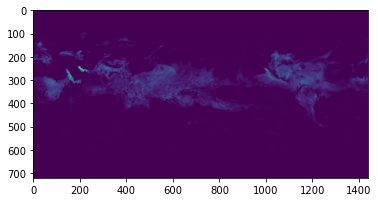

In [67]:
plt.imshow(ds_cape.cape[2000].to_numpy())

In [69]:
time.iloc[365] - pd.Timedelta(days=2)

Timestamp('2016-02-11 05:00:00')

In [60]:
CAPE_CRIT = 1000.0 # J / kg

ip_contribs = np.zeros((
  24,
  ds_cape.sizes['time']//24,
  ds_cape.sizes['latitude'],
  ds_cape.sizes['longitude']
))

for i, t in enumerate(time):
  h = i % 24
  d = i // 24
  
  cape = ds_cape.cape[i].to_numpy()

  tp_time = 
  
  tp = ds_tp.tp[i].to_numpy()
  tcrw = ds_tcrw.tcrw[i].to_numpy()

  print(cape.shape)
  print(tp.shape)
  print(tcrw.shape)
  
  ip_contribs[h,d,:,:] = tp / tcrw * np.array(cape > CAPE_CRIT, dtype=float)

  del cape
  del tp
  del tcrw

  print(h,d)

(721, 1440)
(12, 721, 1440)
(721, 1440)


/tmp/ipykernel_495750/2902384987.py:22: RuntimeWarning: divide by zero encountered in divide
  ip_contribs[h,d,:,:] = tp / tcrw * np.array(cape > CAPE_CRIT, dtype=float)
/tmp/ipykernel_495750/2902384987.py:22: RuntimeWarning: invalid value encountered in divide
  ip_contribs[h,d,:,:] = tp / tcrw * np.array(cape > CAPE_CRIT, dtype=float)
/tmp/ipykernel_495750/2902384987.py:22: RuntimeWarning: invalid value encountered in multiply
  ip_contribs[h,d,:,:] = tp / tcrw * np.array(cape > CAPE_CRIT, dtype=float)


ValueError: could not broadcast input array from shape (12,721,1440) into shape (721,1440)

In [47]:
def compute_ip_contribs()

1

In [11]:
ds_cape.close()
ds_tp.close()
ds_tcrw.close()